In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [5]:
data['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

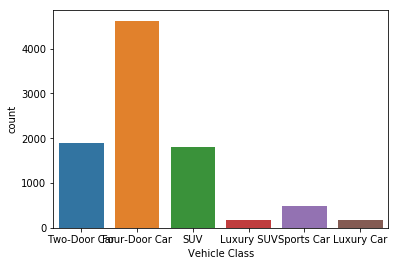

In [6]:
import seaborn as sns
sns.countplot(x = 'Vehicle Class',data = data)

In [7]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
pd.crosstab(data['Policy'],data['Vehicle Class'],margins=True)

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,All
Policy,,,,,,,
Corporate L1,193,7,7,69,18,65,359
Corporate L2,302,15,12,111,27,128,595
Corporate L3,496,18,13,213,59,215,1014
Personal L1,640,22,33,218,70,257,1240
Personal L2,1051,28,40,439,112,452,2122
Personal L3,1742,66,73,672,173,700,3426
Special L1,36,1,0,15,3,11,66
Special L2,89,2,5,26,15,27,164
Special L3,72,4,1,33,7,31,148


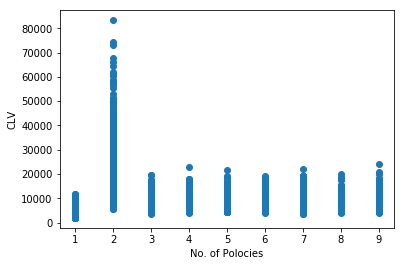

In [9]:
x=data.iloc[:,16]
y=data.iloc[:,2]
plt.xlabel('No. of Polocies')
plt.ylabel('CLV')
plt.scatter(x,y)
plt.show()

In [10]:
data['Vehicle Class']=data['Vehicle Class'].map({'Four-Door Car' : 1,'Luxury Car' : 2,'Luxury SUV' : 3,'SUV' : 4,'Sports Car' : 5,'Two-Door Car' : 6})

In [11]:
pd.crosstab(data['Policy Type'],data['State'],margins=True)

State,Arizona,California,Nevada,Oregon,Washington,All
Policy Type,,,,,,
Corporate Auto,333,739,195,540,161,1968
Personal Auto,1293,2298,652,1938,607,6788
Special Auto,77,113,35,123,30,378
All,1703,3150,882,2601,798,9134


In [12]:
data['State']=data['State'].map({'Arizona' : 1,'California' : 2,'Nevada' : 3,'Oregon' : 4,'Washington' : 5})


In [13]:
pd.crosstab(data['EmploymentStatus'],data['Policy'],margins=True)

Policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,All
EmploymentStatus,,,,,,,,,,
Disabled,18,14,50,64,108,133,8,7,3,405
Employed,214,380,644,777,1296,2150,41,101,95,5698
Medical Leave,17,31,42,50,115,158,3,10,6,432
Retired,10,12,32,34,65,118,2,1,8,282
Unemployed,100,158,246,315,538,867,12,45,36,2317
All,359,595,1014,1240,2122,3426,66,164,148,9134


In [14]:
data['Response']=data['Response'].map({'No' : 0,'Yes' : 1})


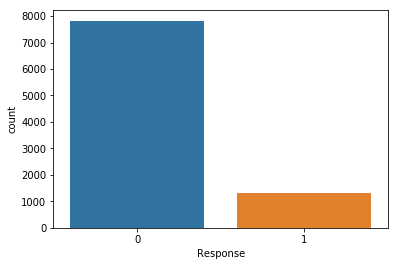

In [15]:
sns.countplot(x = 'Response',data = data)

In [16]:
pd.crosstab(data['Policy Type'],data['Coverage'],margins=True)

Coverage,Basic,Extended,Premium,All
Policy Type,,,,
Corporate Auto,1205,582,181,1968
Personal Auto,4138,2038,612,6788
Special Auto,225,122,31,378
All,5568,2742,824,9134


In [17]:
data['Coverage']=data['Coverage'].map({'Basic' : 1,'Extended' : 2,'Premium' : 3})


In [18]:
pd.crosstab(data['Policy'],data['Education'],margins=True)

Education,Bachelor,College,Doctor,High School or Below,Master,All
Policy,,,,,,
Corporate L1,111,112,7,109,20,359
Corporate L2,193,165,22,160,55,595
Corporate L3,312,295,33,307,67,1014
Personal L1,380,359,53,340,108,1240
Personal L2,628,614,79,618,183,2122
Personal L3,1016,1019,135,976,280,3426
Special L1,16,22,3,19,6,66
Special L2,44,56,7,46,11,164
Special L3,48,39,3,47,11,148


In [19]:
data['Education']=data['Education'].map({'Bachelor' : 1,'College' : 2,'Doctor' : 3,'High School or Below' : 4,'Master' : 5})


In [20]:
data['EmploymentStatus']=data['EmploymentStatus'].map({'Disabled' : 1,'Employed' : 2,'Medical Leave' : 3,'Retired' : 4,'Unemployed' : 5})


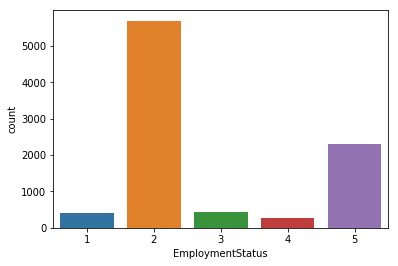

In [21]:
sns.countplot(x = 'EmploymentStatus',data = data)

In [22]:
pd.crosstab(data['Policy Type'],data['Gender'],margins=True)

Gender,F,M,All
Policy Type,,,
Corporate Auto,1005,963,1968
Personal Auto,3454,3334,6788
Special Auto,199,179,378
All,4658,4476,9134


In [23]:
data['Gender']=data['Gender'].map({'F' : 1,'M' : 2})


In [24]:
pd.crosstab(data['Renew Offer Type'],data['Location Code'],margins=True)

Location Code,Rural,Suburban,Urban,All
Renew Offer Type,,,,
Offer1,625,2557,570,3752
Offer2,598,1765,563,2926
Offer3,301,851,280,1432
Offer4,249,606,169,1024
All,1773,5779,1582,9134


In [25]:
data['Location Code']=data['Location Code'].map({'Rural' : 1,'Suburban' : 2,'Urban' : 3})


In [26]:
pd.crosstab(data['Location Code'],data['Marital Status'],margins=True)

Marital Status,Divorced,Married,Single,All
Location Code,,,,
1,281,1227,265,1773
2,870,2944,1965,5779
3,218,1127,237,1582
All,1369,5298,2467,9134


In [27]:
data['Marital Status']=data['Marital Status'].map({'Divorced' : 1,'Married' : 2,'Single' : 3})

In [28]:
pd.crosstab(data['Marital Status'],data['Policy Type'],margins=True)

Policy Type,Corporate Auto,Personal Auto,Special Auto,All
Marital Status,,,,
1,311,1013,45,1369
2,1127,3947,224,5298
3,530,1828,109,2467
All,1968,6788,378,9134


In [29]:
data['Policy Type']=data['Policy Type'].map({'Corporate Auto' : 1,'Personal Auto' : 2,'Special Auto' : 3})


In [30]:
pd.crosstab(data['Vehicle Size'],data['Policy'],margins=True)

Policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3,All
Vehicle Size,,,,,,,,,,
Large,37,59,102,111,230,371,5,19,12,946
Medsize,256,418,722,884,1481,2401,47,105,110,6424
Small,66,118,190,245,411,654,14,40,26,1764
All,359,595,1014,1240,2122,3426,66,164,148,9134


In [31]:
data['Policy']=data['Policy'].map({'Corporate L1' : 1,'Corporate L2' : 2,'Corporate L3' : 3,'Personal L1' : 4,'Personal L2' : 5,'Personal L3' : 6,'Special L1' : 7,'Special L2' : 8,'Special L3' : 9})


In [32]:
pd.crosstab(data['Sales Channel'],data['Renew Offer Type'],margins=True)

Renew Offer Type,Offer1,Offer2,Offer3,Offer4,All
Sales Channel,,,,,
Agent,1690,978,518,291,3477
Branch,1099,788,394,286,2567
Call Center,588,647,291,239,1765
Web,375,513,229,208,1325
All,3752,2926,1432,1024,9134


In [33]:
data['Renew Offer Type']=data['Renew Offer Type'].map({'Offer1' : 1,'Offer2' : 2,'Offer3' : 3,'Offer4' : 4})


In [34]:
pd.crosstab(data['Vehicle Size'],data['Location Code'],margins=True)

Location Code,1,2,3,All
Vehicle Size,,,,
Large,200,603,143,946
Medsize,1394,3759,1271,6424
Small,179,1417,168,1764
All,1773,5779,1582,9134


In [35]:
data['Sales Channel']=data['Sales Channel'].map({'Agent' : 1,'Branch' : 2,'Call Center' : 3,'Web' : 4})


In [36]:
data['Vehicle Size']=data['Vehicle Size'].map({'Large' : 1,'Medsize' : 2,'Small' : 3})


In [37]:
p=data.iloc[:,1:25]

q=data.iloc[:,2]

In [38]:
del p["Effective To Date"]
del p["Customer Lifetime Value"]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
p[:] = scaler.fit_transform(p[:])
#p[:]=scaler.transform(p[:])

E:\laptop softwares\anoconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1D9DAE518>,
      dtype=object)

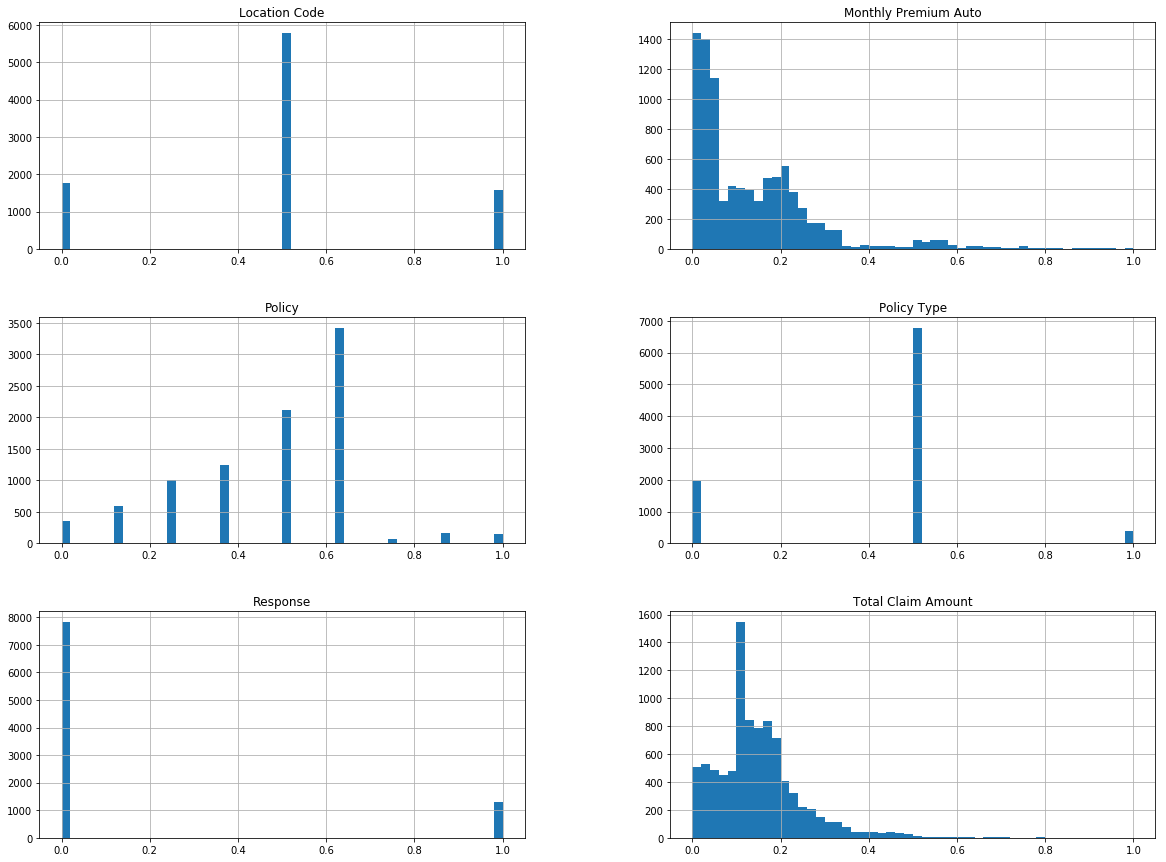

In [40]:
features=["Total Claim Amount","Response","Monthly Premium Auto","Policy Type","Policy","Location Code"]
p[features].hist(bins = 50,figsize = (20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1DA8A3A90>,
      dtype=object)

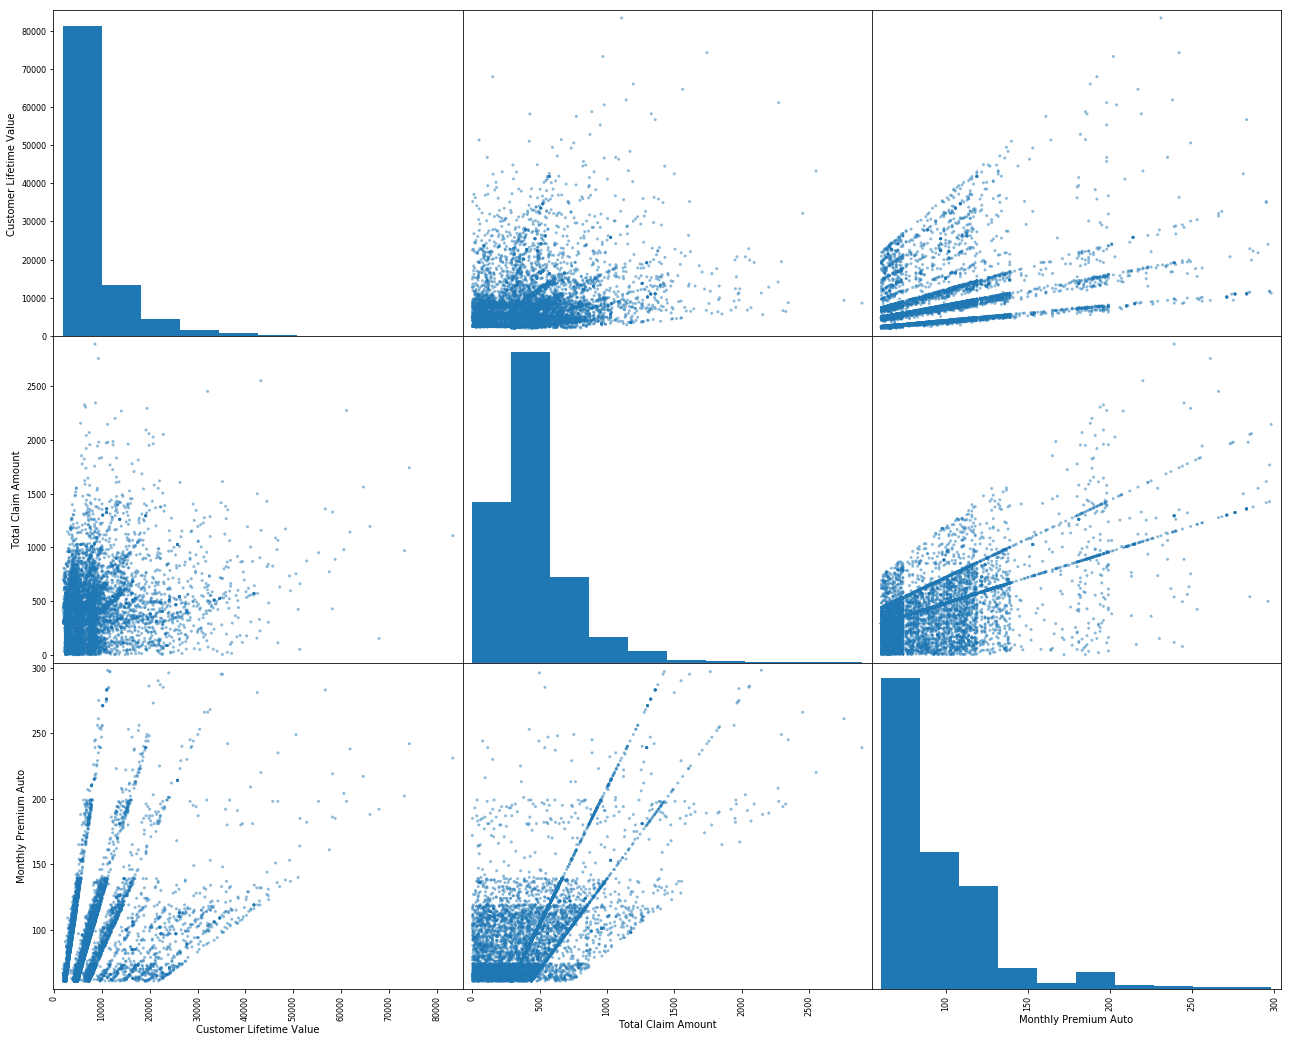

In [41]:
from pandas.plotting import scatter_matrix
Attributes= ["Customer Lifetime Value","Total Claim Amount","Monthly Premium Auto"]
scatter_matrix(data[Attributes],figsize = (22,18),)

In [42]:
data['Total Claim Amount'].skew()

1.7149658097209557

In [43]:

data['Monthly Premium Auto'].skew()

2.1235464499475345

In [44]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

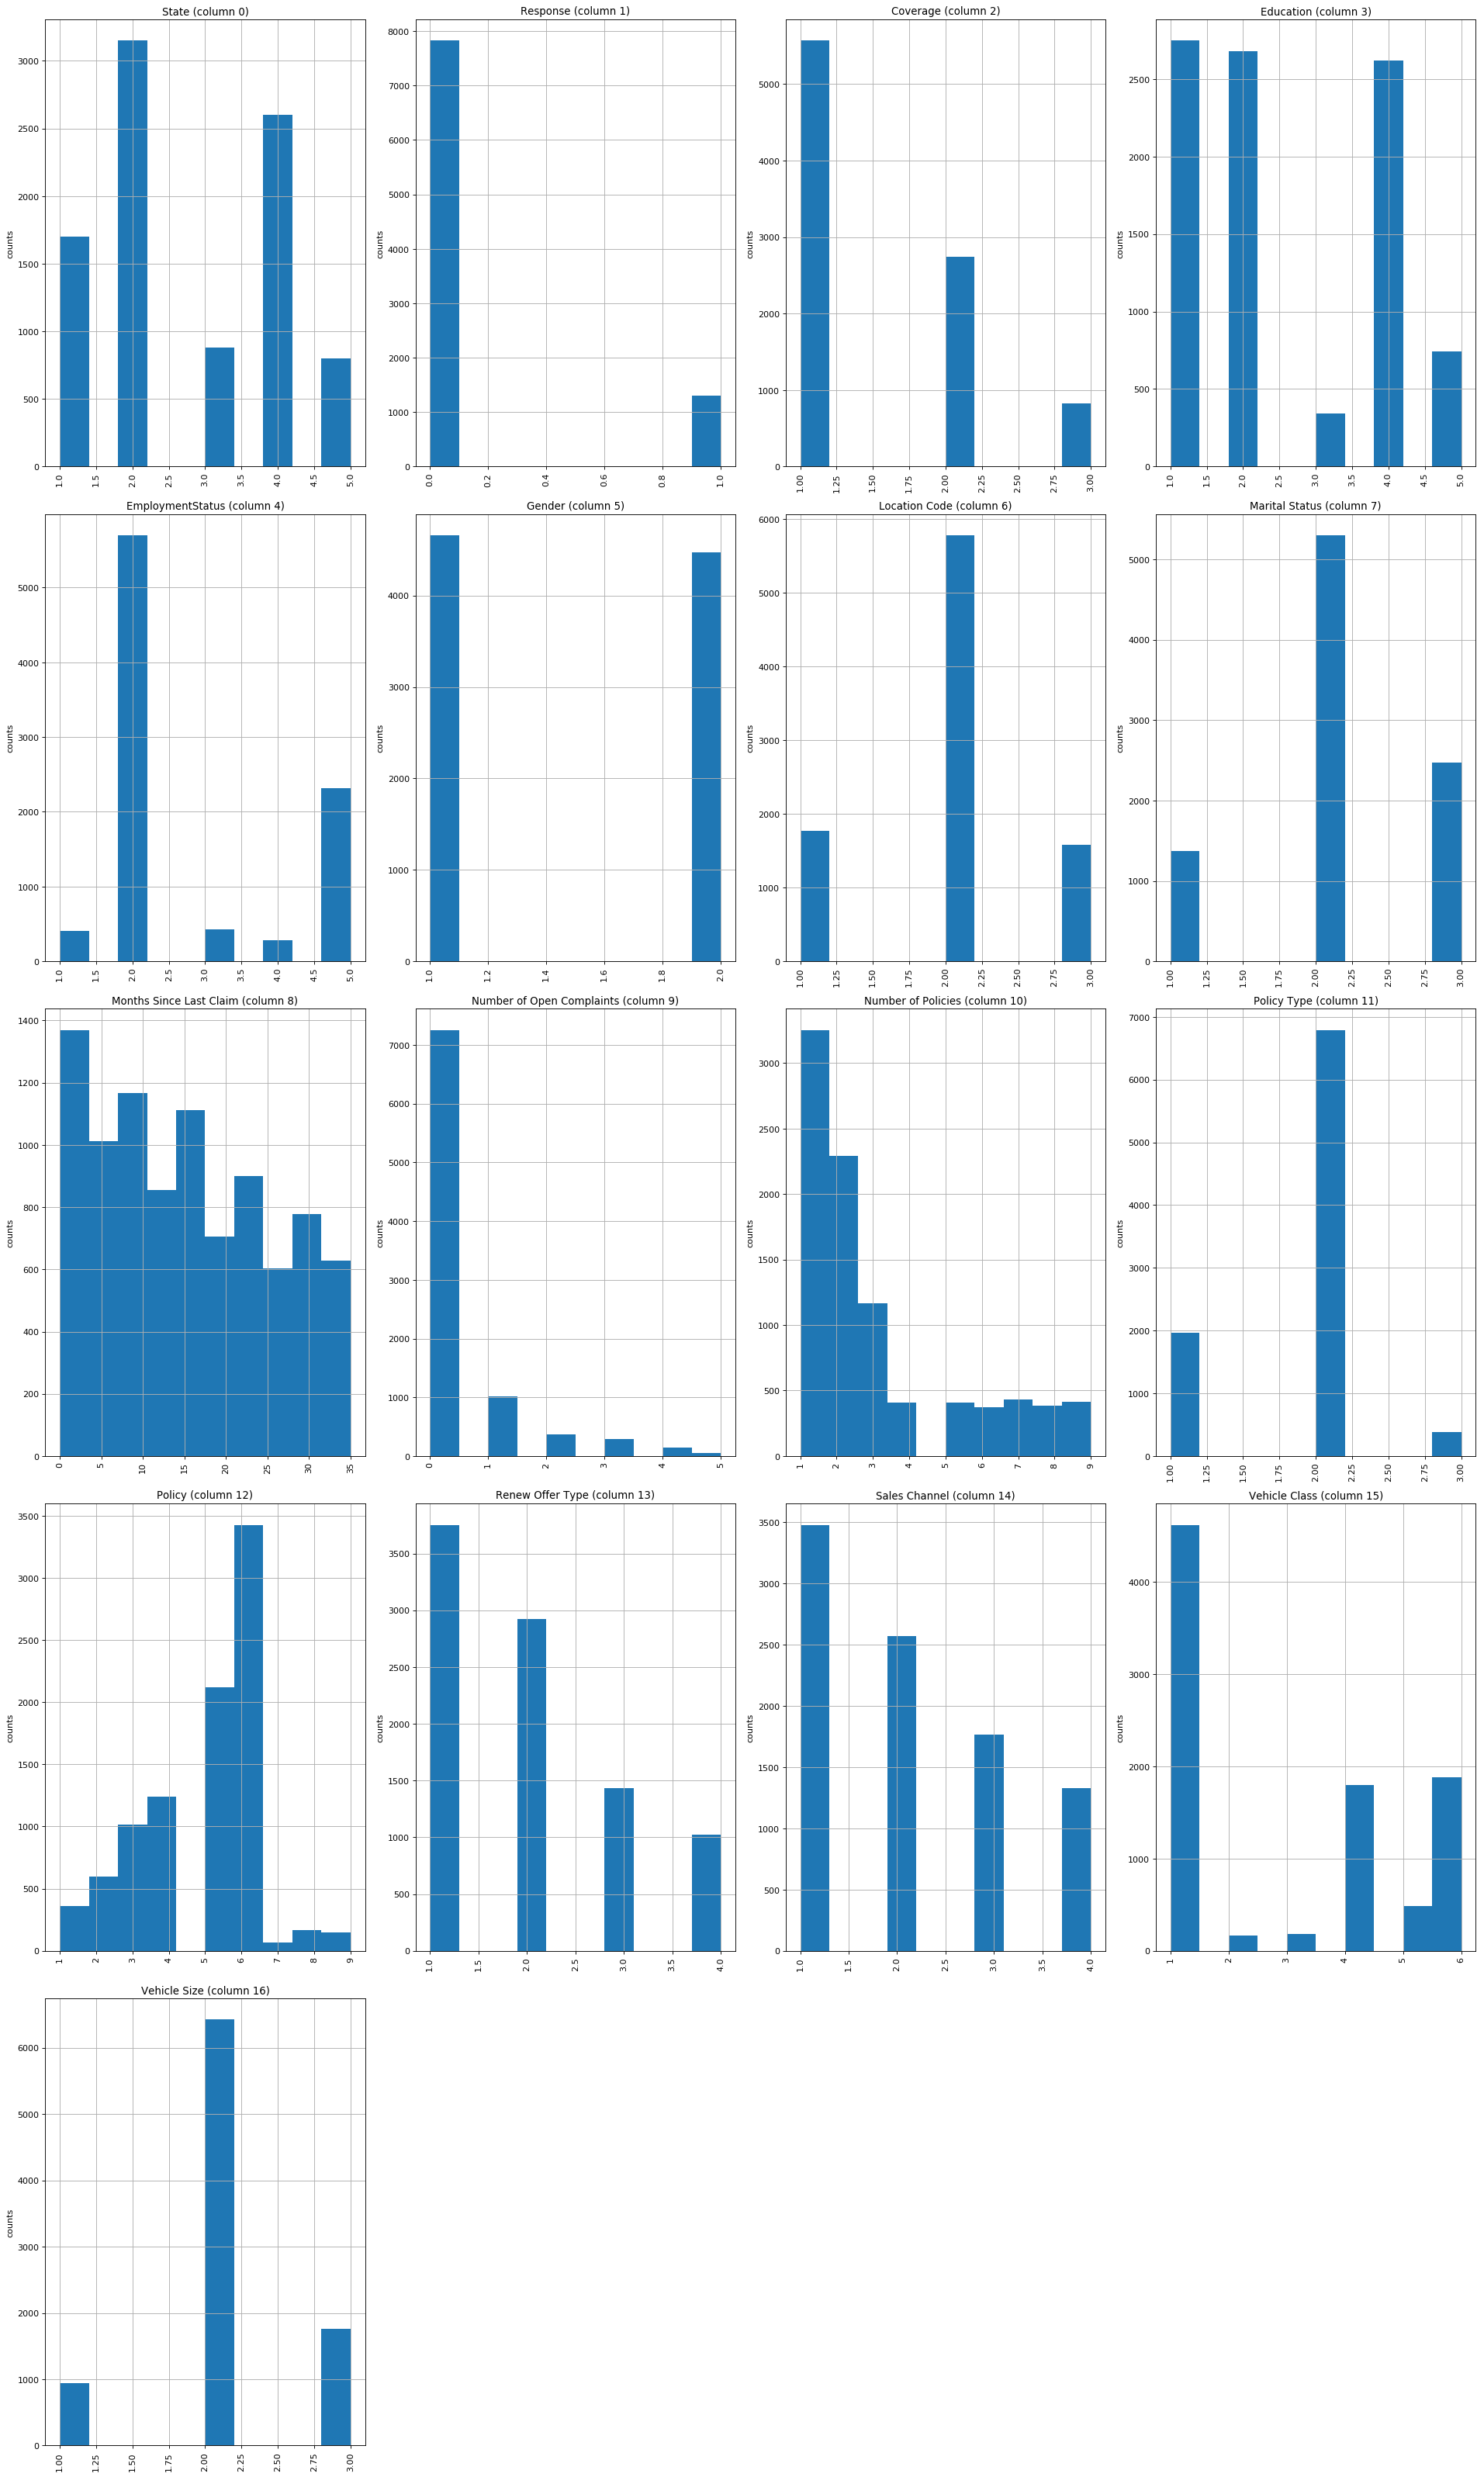

In [45]:
plotPerColumnDistribution(data,30,4)

In [46]:
data['Income'].skew()

0.28688727581189166

In [47]:
p["Monthly Premium Auto"].describe()

count    9134.000000
mean        0.135946
std         0.145181
min         0.000000
25%         0.029536
50%         0.092827
75%         0.202532
max         1.000000
Name: Monthly Premium Auto, dtype: float64

[Text(0.5, 0, 'State'),
 Text(1.5, 0, 'Response'),
 Text(2.5, 0, 'Coverage'),
 Text(3.5, 0, 'Education'),
 Text(4.5, 0, 'EmploymentStatus'),
 Text(5.5, 0, 'Gender'),
 Text(6.5, 0, 'Income'),
 Text(7.5, 0, 'Location Code'),
 Text(8.5, 0, 'Marital Status'),
 Text(9.5, 0, 'Monthly Premium Auto'),
 Text(10.5, 0, 'Months Since Last Claim'),
 Text(11.5, 0, 'Months Since Policy Inception'),
 Text(12.5, 0, 'Number of Open Complaints'),
 Text(13.5, 0, 'Number of Policies'),
 Text(14.5, 0, 'Policy Type'),
 Text(15.5, 0, 'Policy'),
 Text(16.5, 0, 'Renew Offer Type'),
 Text(17.5, 0, 'Sales Channel'),
 Text(18.5, 0, 'Total Claim Amount'),
 Text(19.5, 0, 'Vehicle Class'),
 Text(20.5, 0, 'Vehicle Size')]

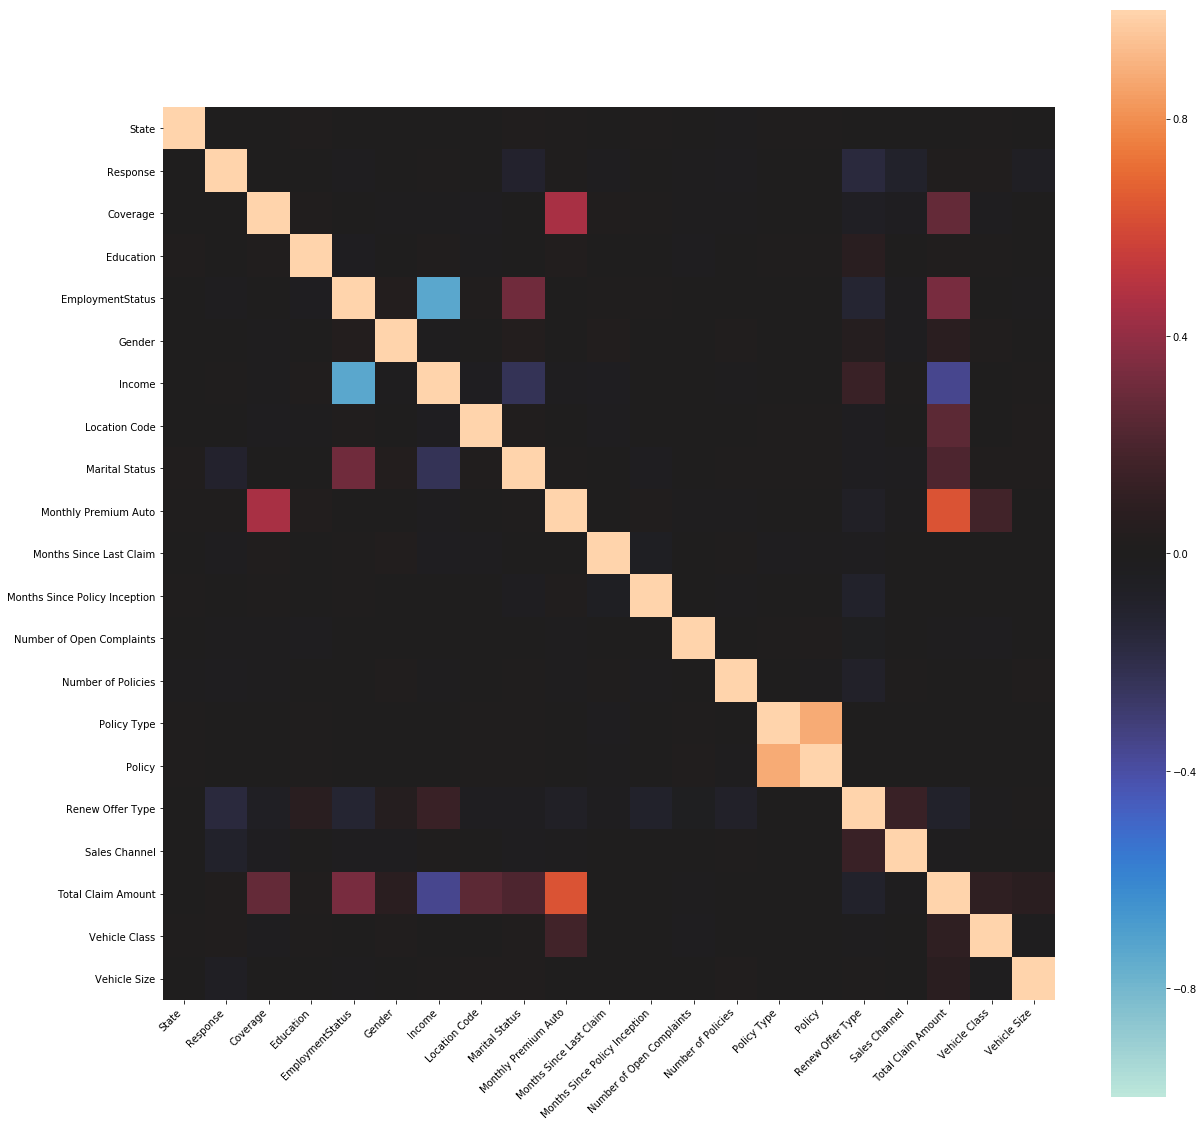

In [48]:
corr = p.corr()
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [49]:
data[data['Response'] == 0]['Customer Lifetime Value'].mean()

8030.022304870696

In [50]:
data[data['Response'] == 1]['Customer Lifetime Value'].mean()

7854.871361325684

In [51]:
data[data['Response'] == 0]['Customer Lifetime Value'].std()

6968.569280048796

In [52]:
data[data['Response'] == 1]['Customer Lifetime Value'].std()

6255.638228581915

In [53]:
p.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1.00,0.0,0.0,0.0,0.25,0.0,0.562847,0.5,0.5,0.033755,...,0.050505,0.0,0.000,0.0,0.250,0.000000,0.000000,0.132974,1.0,0.5
1,0.00,0.0,0.5,0.0,1.00,0.0,0.000000,0.5,1.0,0.139241,...,0.424242,0.0,0.875,0.5,0.625,0.666667,0.000000,0.391051,0.0,0.5
2,0.50,0.0,1.0,0.0,0.25,0.0,0.487763,0.5,0.5,0.198312,...,0.383838,0.0,0.125,0.5,0.625,0.000000,0.000000,0.195764,1.0,0.5
3,0.25,0.0,0.0,0.0,1.00,1.0,0.000000,0.5,0.5,0.189873,...,0.656566,0.0,0.750,0.0,0.125,0.000000,0.666667,0.183117,0.6,0.5
4,1.00,0.0,0.0,0.0,0.25,1.0,0.438443,0.0,1.0,0.050633,...,0.444444,0.0,0.000,0.5,0.375,0.000000,0.000000,0.047710,0.0,0.5


In [54]:
data[data['Location Code'] == 2]['Customer Lifetime Value'].mean()

8004.457414978725

In [55]:
del p['Number of Open Complaints']
del p['Education']
del p['EmploymentStatus']
del p['Vehicle Size']
del p['Months Since Policy Inception']


In [56]:
del p['Policy']

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train_index,test_index in split.split(p,p['Response']):
    p_train, p_test = p.loc[train_index],p.loc[test_index]
    q_train, q_test = q.loc[train_index], q.loc[test_index]

In [58]:
p_train['Monthly Premium Auto']= np.sqrt(p_train['Monthly Premium Auto'])
p_test['Monthly Premium Auto']= np.sqrt(p_test['Monthly Premium Auto'])
p_train['Monthly Premium Auto'].skew()

0.6044979278115128

In [59]:
p_train['Total Claim Amount']= np.sqrt(p_train['Total Claim Amount'])
p_test['Total Claim Amount']= np.sqrt(p_test['Total Claim Amount'])
p_train['Total Claim Amount'].skew()

0.17483040150559556

In [141]:
#to remove outliers
q_train = np.log10(q_train)
q_test = np.log10(q_test)

In [195]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize=True)
regressor.fit(p_train, q_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [196]:
regressor.coef_

array([-3.56144104e-04, -1.90529245e-02, -2.54615477e-02, -4.41930257e-03,
        5.08862203e-02,  6.59445017e-04, -2.64977674e-02,  7.04742511e-01,
        1.16568972e-02,  1.85350569e-01,  1.48541469e-02, -4.65809152e-02,
       -3.20522704e-03,  2.07817890e-02,  9.37056681e-03])

In [197]:
regressor.intercept_

3.5280814024582448

In [198]:
regressor.score(p,q)

-1.356207797199855

In [199]:
regressor.score(p_test,q_test)

0.273965776572449

In [200]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state=0)
regressor1.fit(p_train,q_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [201]:
regressor1.score(p,q)

-1.356149567634651

In [67]:
regressor1.score(p_test,q_test)

0.49483517321114967

In [73]:
regressor2.score(p_test,q_test)

0.6941366292860378

In [89]:
import time
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [106]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1),
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(p_train, q_train)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(p_train, q_train)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


SVR complexity and bandwidth selected and model fitted in 123.189 s
KRR complexity and bandwidth selected and model fitted in 206.387 s


In [107]:
kr.score(p_test,q_test)

0.37016818940469065

In [108]:
svr.score(p_test,q_test)

0.07488382536458728

In [202]:
from sklearn.ensemble import BaggingRegressor
model1=BaggingRegressor(base_estimator=regressor1,n_estimators=1000,random_state=42)
model1.fit(p_train,q_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=1000, n_jobs=None, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [203]:
model1.score(p,q)

-1.356149536820292

In [204]:
model1.score(p_test,q_test)

0.9070865741932984

In [205]:
from sklearn.ensemble import GradientBoostingRegressor
model2=GradientBoostingRegressor(n_estimators=500,random_state=42)
model2.fit(p_train,q_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [206]:
model2.score(p,q)

-1.3561564389029135

In [207]:
model2.score(p_test,q_test)

0.90123710479277

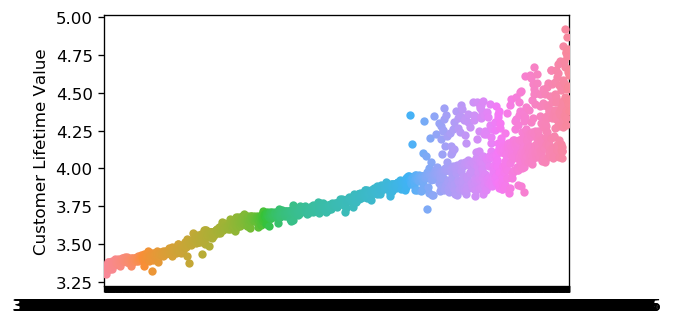

In [208]:
sns.swarmplot(model1.predict(p_test),q_test)

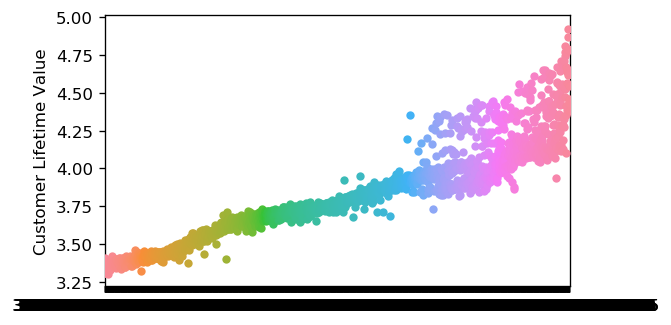

In [209]:
sns.swarmplot(model2.predict(p_test),q_test)

In [142]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [143]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(p_train, q_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.1min
E:\laptop softwares\anoconda\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 27.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [144]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [145]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy




In [146]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(p_train, q_train)
base_accuracy = evaluate(base_model, p_test, q_test)

Model Performance
Average Error: 0.0430 degrees.
Accuracy = 98.95%.


In [147]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, p_test, q_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0428 degrees.
Accuracy = 98.96%.
Improvement of 0.01%.


In [148]:
best_random.score(p_test,q_test)

0.9077661701107307

In [149]:
base_model.score(p_test,q_test)

0.8981851966918606

In [156]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [124]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 12.1min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [125]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, p_test,q_test)

Model Performance
Average Error: 1890.3015 degrees.
Accuracy = 83.21%.


In [126]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -6.19%.


In [127]:
mean_absolute_percentage_error(q_test,best_grid.predict(p_test))

16.792292575887235

In [128]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(best_random.predict(p_train),q_train))
rmse_test = np.sqrt(mean_squared_error(best_random.predict(p_test),q_test))

In [157]:
# Calculate Training and Test Accuracy
training_accuracy = best_random.score(p_train, q_train)
test_accuracy = best_random.score(p_test, q_test)

print("Training Accuracy = %0.3f, Test Accuracy = %0.3f, RMSE (train) = %0.3f, RMSE (test) = %0.3f" % (training_accuracy, test_accuracy, rmse_train, rmse_test))


Training Accuracy = 0.962, Test Accuracy = 0.908, RMSE (train) = 2469.559, RMSE (test) = 4099.724


In [136]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(p_train, y_train)
base_accuracy = evaluate(base_model, p_test, y_test)

Model Performance
Average Error: 0.0430 degrees.
Accuracy = 98.95%.


In [137]:
base_model.score(p_test,y_test)

0.8981851966918606

In [160]:
pd.DataFrame(np.round(np.power(10,np.column_stack((base_model.predict(p_test),q_test))), decimals=0).astype(int)).head(20)

,0,1
0,3455,3268
1,5333,5332
2,3123,3141
3,3847,3875
4,5473,5607
5,4682,4523
6,4733,4692
7,3753,3747
8,19994,13168
9,2563,2652


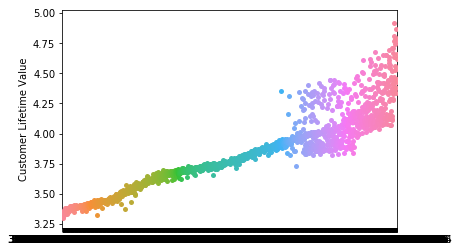

In [158]:
sns.swarmplot(best_random.predict(p_test),q_test)

# MAPE(mean-absolute percentage error)

In [154]:
from sklearn import metrics
def  mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred = np.array(y_true) , np.array(y_pred)
    return np.power(10,np.mean(np.abs((y_true-y_pred)/y_true))*100)

In [155]:
mean_absolute_percentage_error(q_test,best_random.predict(p_test))

11.049014053392435

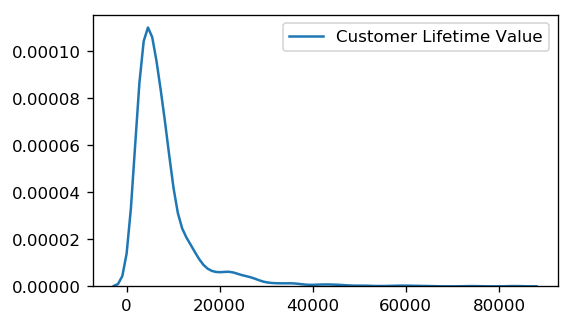

In [189]:
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':120})
sns.kdeplot(np.power(10,q_test))


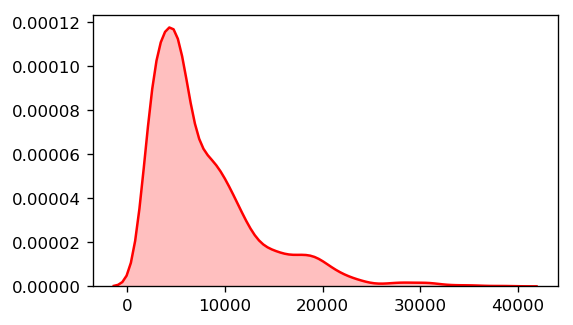

In [190]:
sns.kdeplot(np.power(10,best_random.predict(p_test)),shade=True, color="r")

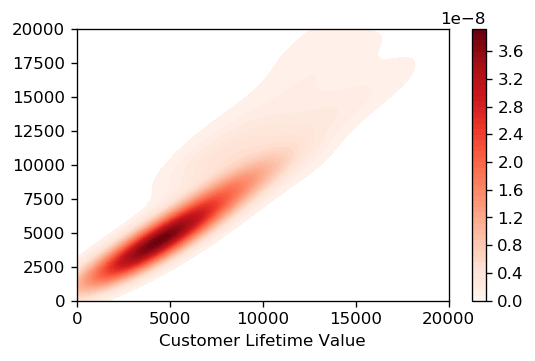

In [216]:
ax = sns.kdeplot(np.power(10,q_test), np.power(10,best_random.predict(p_test)), n_levels=50, cmap="Reds", shade=True, shade_lowest= False,clip = (0,20000),cbar= True)